This data projec focuses on exploratory data analysis of stock prices

In [2]:
import pandas_datareader as dr
import pandas as pd
import numpy as np
from datetime import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Getting data using pandas datareader stock information for the following banks from 200-2016:

Bank of America
CitiGroup
Goldman Sachs
JPMorgan Chase
Morgan Stanley
Wells Fargo

In [3]:
#Bank of America
BAC = dr.data.get_data_yahoo('BAC',start='2006-1-1',end='2016-1-1')
#CitiGroup
C = dr.data.get_data_yahoo('C',start='2006-1-1',end='2016-1-1')
#Goldman Sachs
GS = dr.data.get_data_yahoo('GS',start='2006-1-1',end='2016-1-1')
#JPMorgan
JPM = dr.data.get_data_yahoo('JPM',start='2006-1-1',end='2016-1-1')
#Morgan Stanley
MS = dr.data.get_data_yahoo('MS',start='2006-1-1',end='2016-1-1')
#Wells Fargo
WFC = dr.data.get_data_yahoo('WFC',start='2006-1-1',end='2016-1-1')

Creating the Tickers

In [8]:
tickers = ['BAC','C','GS','JPM','MS','WFC']


Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.

In [9]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

Set the column name levels

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [11]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.717861  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.338535  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.384048  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.330940  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.353695  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.006454  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  38.032536  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  38.136818  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  38.175922  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.580029  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.045347  
2006-01-04   31.799999  31.530001  10870000.0  20.801256  
2006-01-05   31.500000  31.495001  10158000.0  20.778162  
2006-01-06   31.580000  31.680000   8403800.0  20.900213  
2006-01-09   31.674999  31.674999   5619600.0  20.896914  

[5 rows x 36 columns]

The max Close price for each bank's stock throughout the time period?

In [12]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

 Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

𝑟𝑡=𝑝𝑡−𝑝𝑡−1𝑝𝑡−1=𝑝𝑡𝑝𝑡−1−1

In [13]:
returns = pd.DataFrame()


Using pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**



In [16]:
for tick in tickers:
    returns[tick+'Return'] = bank_stocks[tick]['Close'].pct_change()

Creating a pairplot using seaborn of the returns dataframe

C:\Users\lindo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lindo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


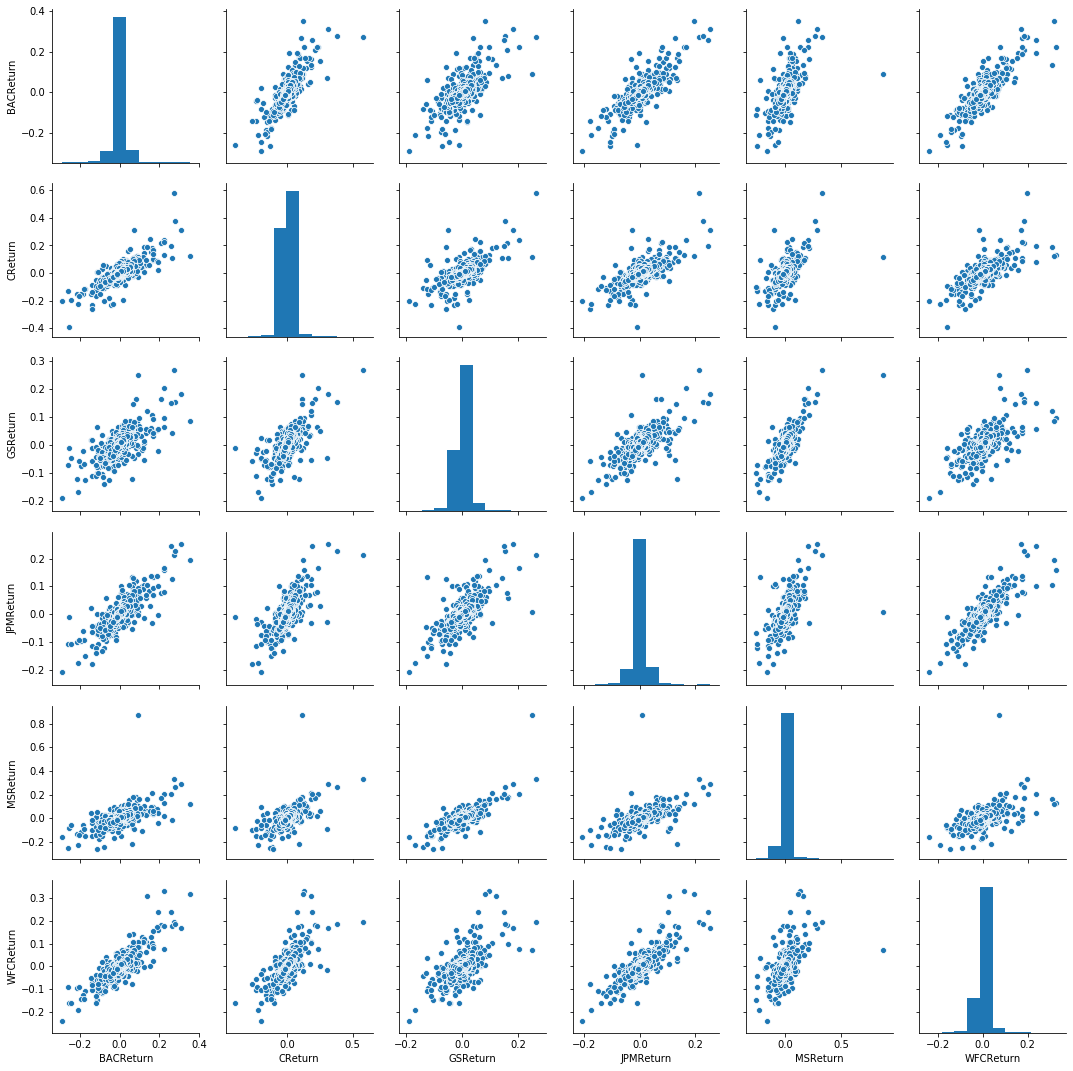

In [15]:
sns.pairplot(returns)

Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.

In [17]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [18]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the   over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [19]:
returns.std()

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFCReturn    0.030238
dtype: float64

In [20]:
returns.loc['2015-01-01':'2015-12-31'].std()


BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

 Creating a distplot using seaborn of the 2015 returns for Morgan Stanley

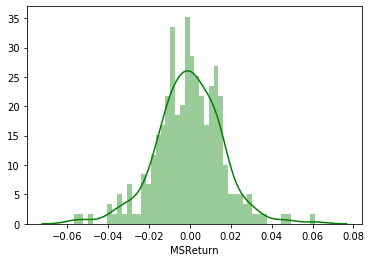

In [21]:
MSReturn = returns['MSReturn']['2015-01-01':'2015-12-31']

sns.distplot(MSReturn,bins=50,color='green')

Creating a distplot using seaborn of the 2008 returns for CitiGroup

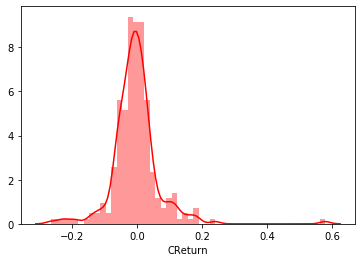

In [22]:
CReturn = returns['CReturn']['2008-01-01':'2008-12-31']
sns.distplot(CReturn,bins=50,color='red')

 Visualization libaberies imports 

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

Creating a line plot showing Close price for each bank for the entire index of time

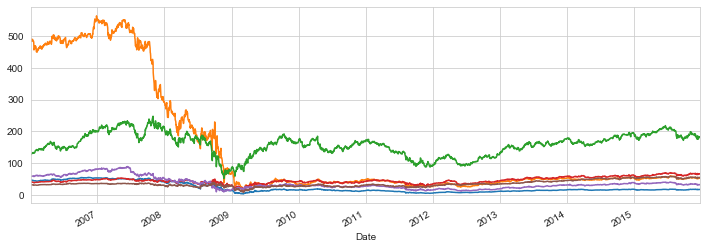

In [24]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))


Analyzing the moving averages for these stocks in the year 2008. 

Ploting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

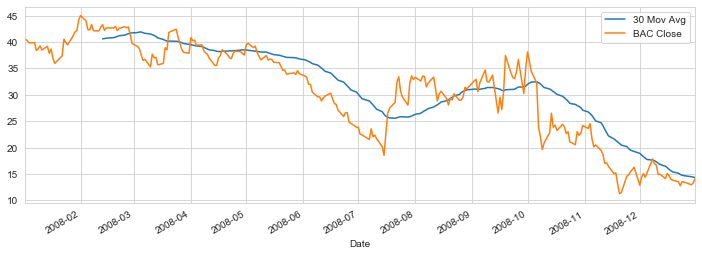

In [25]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Mov Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

Creating a heatmap of the correlation between the stocks Close Price

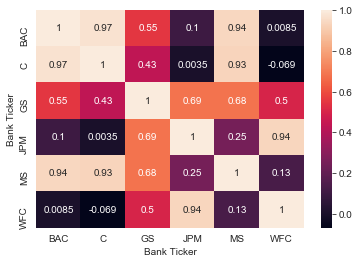

In [26]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Using seaborn's clustermap to cluster the correlations together

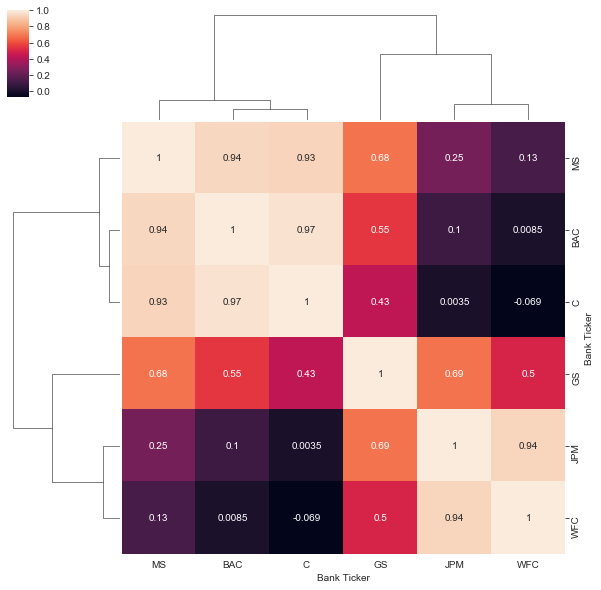

In [27]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

In [28]:
BAC['2015-01-01':'2016-01-01'].iplot(kind='candle')

 Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015

In [29]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015

In [30]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll',periods=[13,21,55]) 